<a href="https://colab.research.google.com/github/deepthikanna/The_Sparks_Foundation_Task03/blob/main/Task03_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAME   : KRISHNA DEEPTHI K  

GRADUATE ROTATIONAL INTERNSHIP PROGRAM
## **THE SPARKS FOUNDATION**                                                                                                                                                                                                                                                                                
DATA SCIENCE AND BUSINESS ANALYTICS TASKS

TASK 03 : PREDICTION USING DECISION TREE ALGORITHM

    From the iris dataset, create the decision tree classifier, predict the right class and visualize it graphically.

*IMPORT*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
data=pd.read_csv("/content/Iris.csv")

In [4]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
37,38,4.9,3.1,1.5,0.1,Iris-setosa
140,141,6.7,3.1,5.6,2.4,Iris-virginica
35,36,5.0,3.2,1.2,0.2,Iris-setosa
108,109,6.7,2.5,5.8,1.8,Iris-virginica
56,57,6.3,3.3,4.7,1.6,Iris-versicolor


In [6]:
data.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
print ("Dataset Lenght:: ", len(data))
print ("Dataset Shape:: ", data.shape)

Dataset Lenght::  150
Dataset Shape::  (150, 6)


In [17]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


*PREPROCESSING DATA*

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data["Species"] = label_encoder.fit_transform(data['Species'])

In [12]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [58]:
data.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [54]:
data['Species'].unique()

array([0, 1, 2])

In [13]:
from sklearn.model_selection import train_test_split
feature_col_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
predicted_class_name=['Species']
x=data[feature_col_names].values
y=data[predicted_class_name].values
split_test_size=0.30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=split_test_size,random_state=1)

In [14]:
#To check the correctness of splitting
trainval=(1.0 * len(x_train)/(1.0 * len(data.index)))
testval=(len(x_test))/(len(data.index))
print(trainval)
print(testval)
print('{0:0.2f}% in training set '.format((trainval)*100))
print('{0:0.2f}% in testing set '.format((testval)*100))

0.7
0.3
70.00% in training set 
30.00% in testing set 


*VISUALIZE DATA*

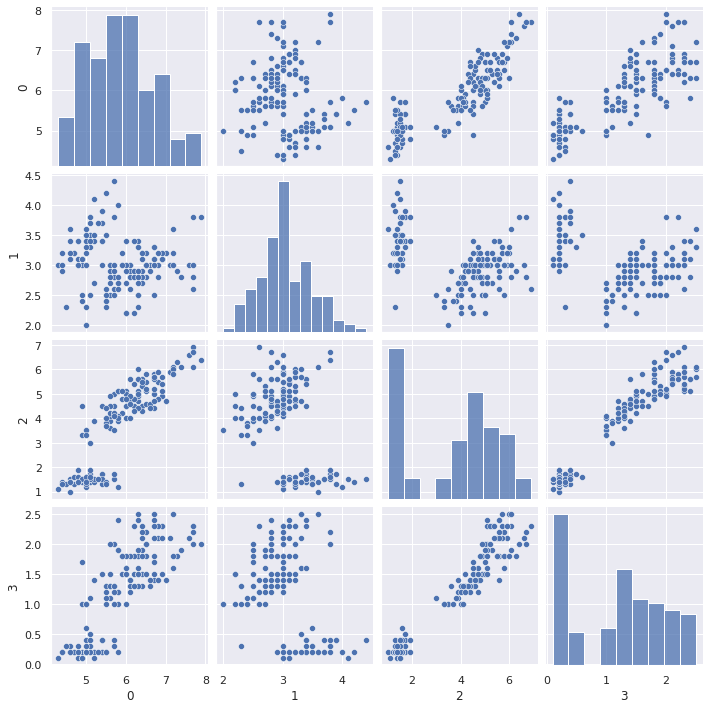

In [20]:
sns.pairplot(pd.DataFrame(x))

*TRAIN DATA(CRITERION-GINI)*

In [21]:
from sklearn.tree import DecisionTreeClassifier
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

*MODEL EVALUATION*

In [24]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix ")
print("{0}".format(confusion_matrix(y_test,y_pred)))

Confusion Matrix 
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [26]:
from sklearn import metrics
print("Classification Report ")
print("{0}".format(metrics.classification_report(y_test,y_pred)))

Classification Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [27]:
print("Accuracy ")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy 
0.9555555555555556


*TRAIN DATA(CRITERION-ENTROPY)*

In [47]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",random_state = 100,
 min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [48]:
y_pred_en = clf_entropy.predict(x_test)
y_pred_en

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [49]:
print ("Accuracy is "), accuracy_score(y_test,y_pred_en)*100

Accuracy is 


(None, 95.55555555555556)

Accuracy Remain Same for both Gini and Entropy criteria

*VISUALIZE TREE*

In [36]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


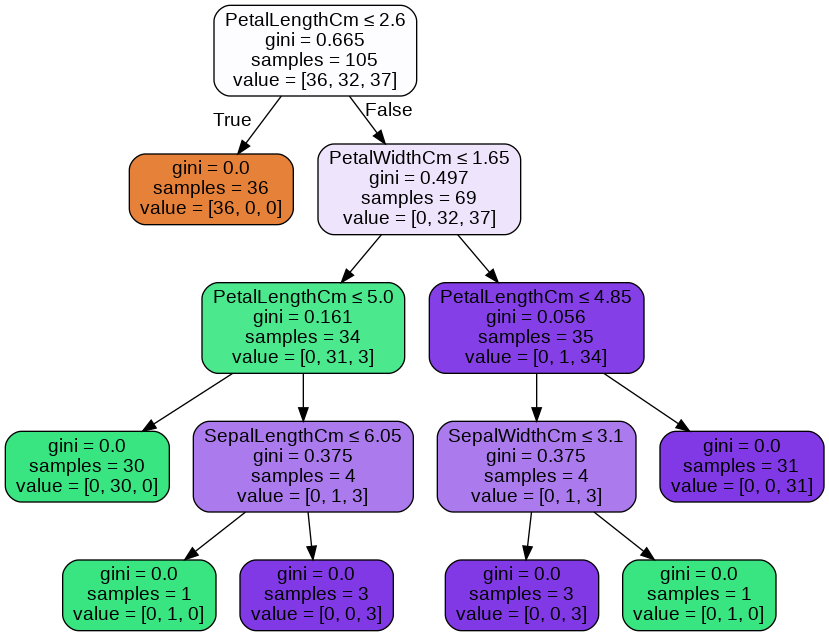

In [39]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,feature_names=feature_col_names,filled=True,rounded=True,special_characters=True)
gr = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(gr.create_png())

*PREDICTION*

In [52]:
model.predict([[6.2,3.3,2.9,1.6]])

array([1])

In [57]:
a = float(input("Enter Sepal Length in cm : "))
b = float(input("Enter Sepal Width in cm : "))
c = float(input("Enter Petal Length in cm : "))
d = float(input("Enter Sepal Width in cm : "))
e = model.predict([[a,b,c,d]])
print(e)
if e==[0]:
  print("The right class is Iris-setosa")
elif e==[1]:
  print("The right class is Iris-versicolor")
elif e==[2]:
  print("The right class is Iris-virginica")
else:
  print("Invalid")

Enter Sepal Length in cm : 5.5
Enter Sepal Width in cm : 3.3
Enter Petal Length in cm : 1.1
Enter Sepal Width in cm : 0.5
[0]
The right class is Iris-setosa
